In [126]:
# Classification template
# (Cleaned up version)

# Logistic regression on Social Network dataset
# by taking into account the age and estimated salary to predict the output

# The Social Network dataset contains 400 entries and 3 relevant features:
# gender, age, estimated salary (and if the user purchased)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [112]:
def drawClasses(X_set, y_set, c1, c2, title_name, x_label, y_label, classes, classifier=None):
    plt.figure()

    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, c1].min() - 1, stop=X_set[:, c1].max() + 1, step=0.01),
        np.arange(start=X_set[:, c2].min() - 1, stop=X_set[:, c2].max() + 1, step=0.01),
    )

    if classifier:
        plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), # ???
                     alpha=0.25, cmap=ListedColormap(classes))

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(
            X_set[y_set == j, 0],
            X_set[y_set == j, 1],
            # c = ListedColormap(classes)(i), # nop
            color=ListedColormap(classes)(i),
            label=j,
        )

    plt.title(f'Classifier ({title_name})')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

In [113]:
# Importing the dataset
dataset = pd.read_csv('../Datasets/Social_Network_Ads.csv') #,header=None)
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

classes=('red', 'blue')

In [114]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [115]:
# Feature Scaling
# https://datascience.stackexchange.com/a/12346

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [116]:
# Fitting classifier to the Training set
# Create your classifier here

classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [117]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[65  3]
 [ 8 24]]


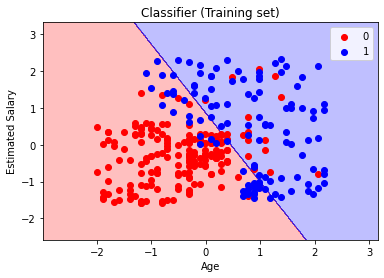

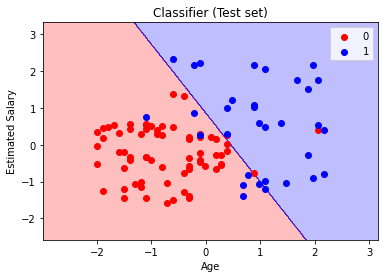

In [125]:
#plt.figure()
#scatter_matrix(dataset)
# Visualising the Training set results
drawClasses(X_train, y_train, 0, 1, 'Training set', 'Age', 'Estimated Salary', classes, classifier)
drawClasses(X_test, y_test, 0 , 1, 'Test set', 'Age', 'Estimated Salary', classes, classifier)
